## Кузнецов Илья Александрович, 471 группа
# Задача 3. Многоклассовая классификация и множественная классификация/регрессия

* **Дедлайн**: 11.12.2022, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [x] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [ ] * (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [ ] * (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.


In [815]:
%precision 4
import warnings
warnings.filterwarnings('ignore')

# Датасет

В качестве набора данных рассмотрим встроенный в **sklearn** датасет с информацией о разновидностях ириса.

Признаки:
- **sepal length (cm)** - длина чашелистика,
- **sepal width (cm)** - ширина чашелистика,
- **petal length (cm)** - длина лепестка,
- **petal width (cm)** - ширина лепестка.

Целевой признак:
- **target** - вид ириса.

In [816]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Пропущенных значений в данных нет, поэтому дополнительно их чистить или дополнять не требуется.
Выборка обладает количественными признаками для решения задачи классификации.
В данных с виду не наблюдается явно лишних признаков.

Однако целевой признак удобно закодировать целыми числами.

In [818]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Разведочный анализ (EDA)

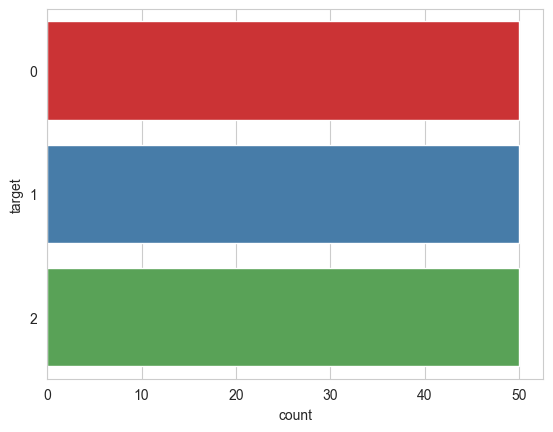

In [819]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, y="target", palette="Set1")
plt.show()

In [820]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

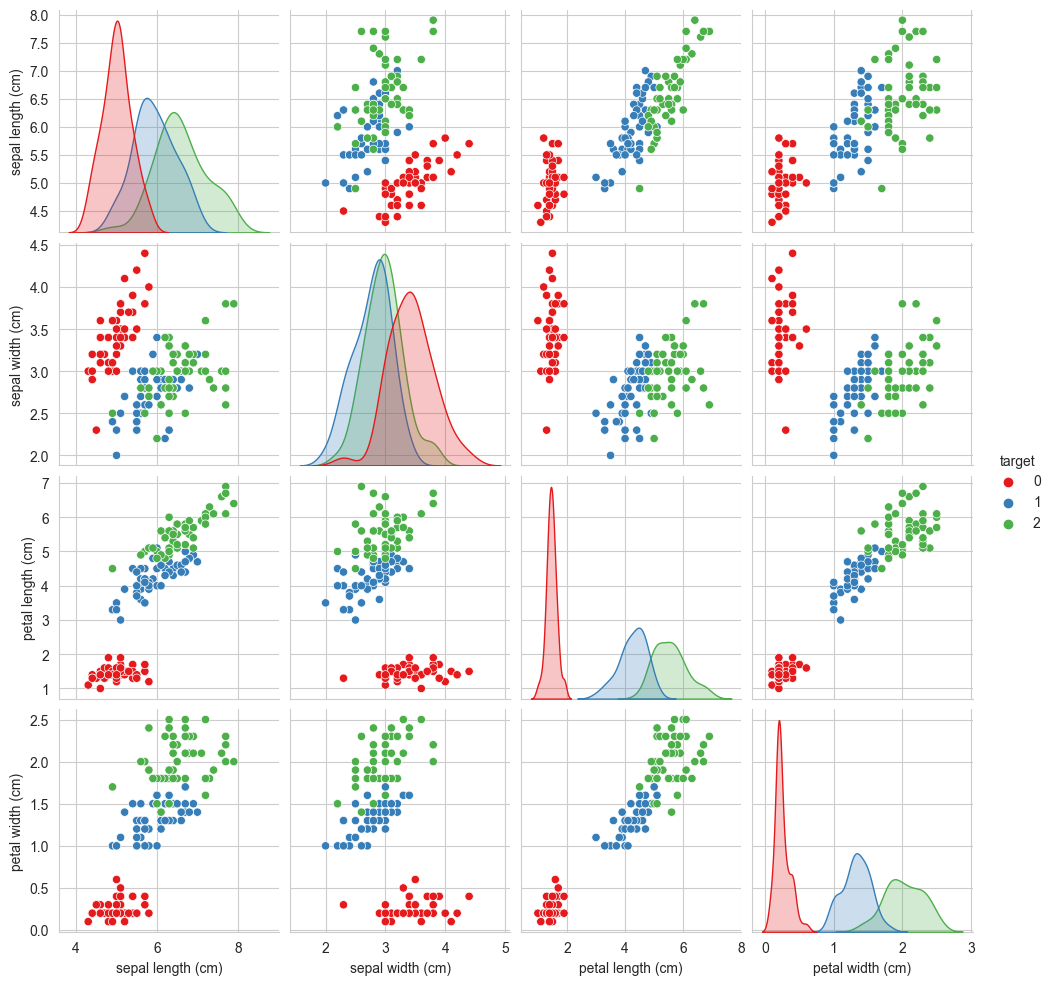

In [821]:
sns.pairplot(df, hue='target', palette="Set1")

Исходя из распределений ясно, что ирис вида **0** заметно отличается по всем параметрам своего листа от двух других видов.
Остальные виды **1** и **2** имеют несколько совпадающих параметров листа, особенно **sepal length (cm)**. Поэтому данный признак лучше не учитывать для данных видов.

Интересно отдельно посмотреть на распределения каждого признака относительно целевого.

<AxesSubplot: xlabel='sepal length (cm)', ylabel='Count'>

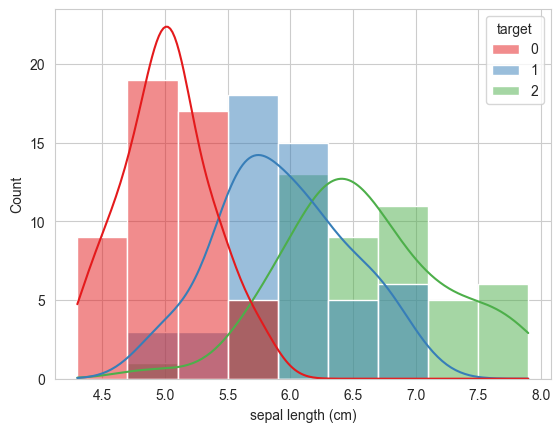

In [822]:
sns.histplot(x='sepal length (cm)', hue='target', data=df, kde=True, palette='Set1')

<AxesSubplot: xlabel='sepal width (cm)', ylabel='Count'>

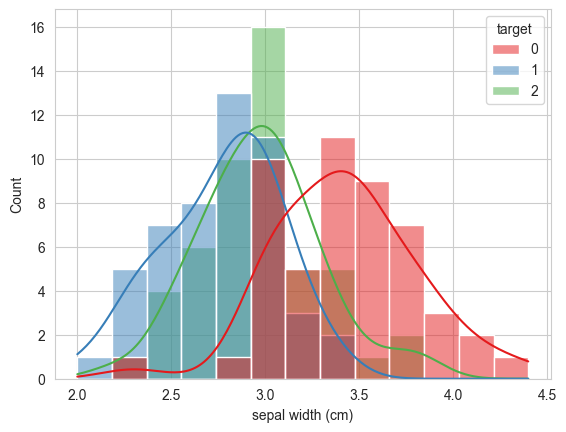

In [823]:
sns.histplot(x='sepal width (cm)', hue='target', data=df, kde=True, palette='Set1')

<AxesSubplot: xlabel='petal length (cm)', ylabel='Count'>

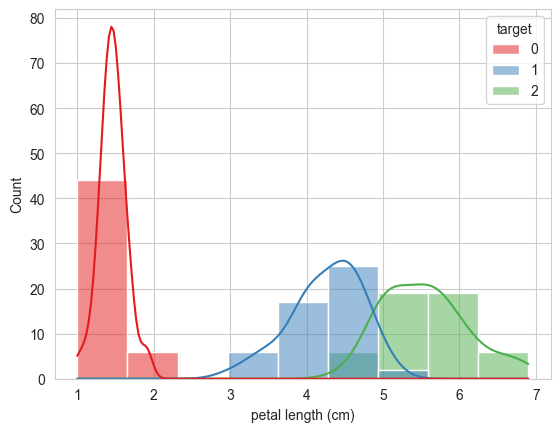

In [824]:
sns.histplot(x='petal length (cm)', hue='target', data=df, kde=True, palette='Set1')

<AxesSubplot: xlabel='petal width (cm)', ylabel='Count'>

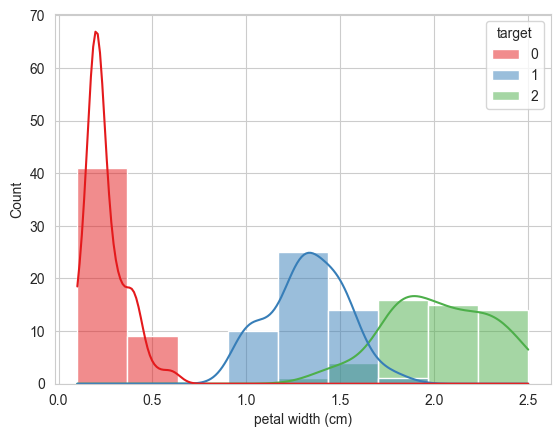

In [825]:
sns.histplot(x='petal width (cm)', hue='target', data=df, kde=True, palette='Set1')

Графики показывают, что именно по признакам **petal** будет проще всего решать, какому классу принадлежит ирис.

Наконец, изучим корреляционную карту данного датасета.

<AxesSubplot: >

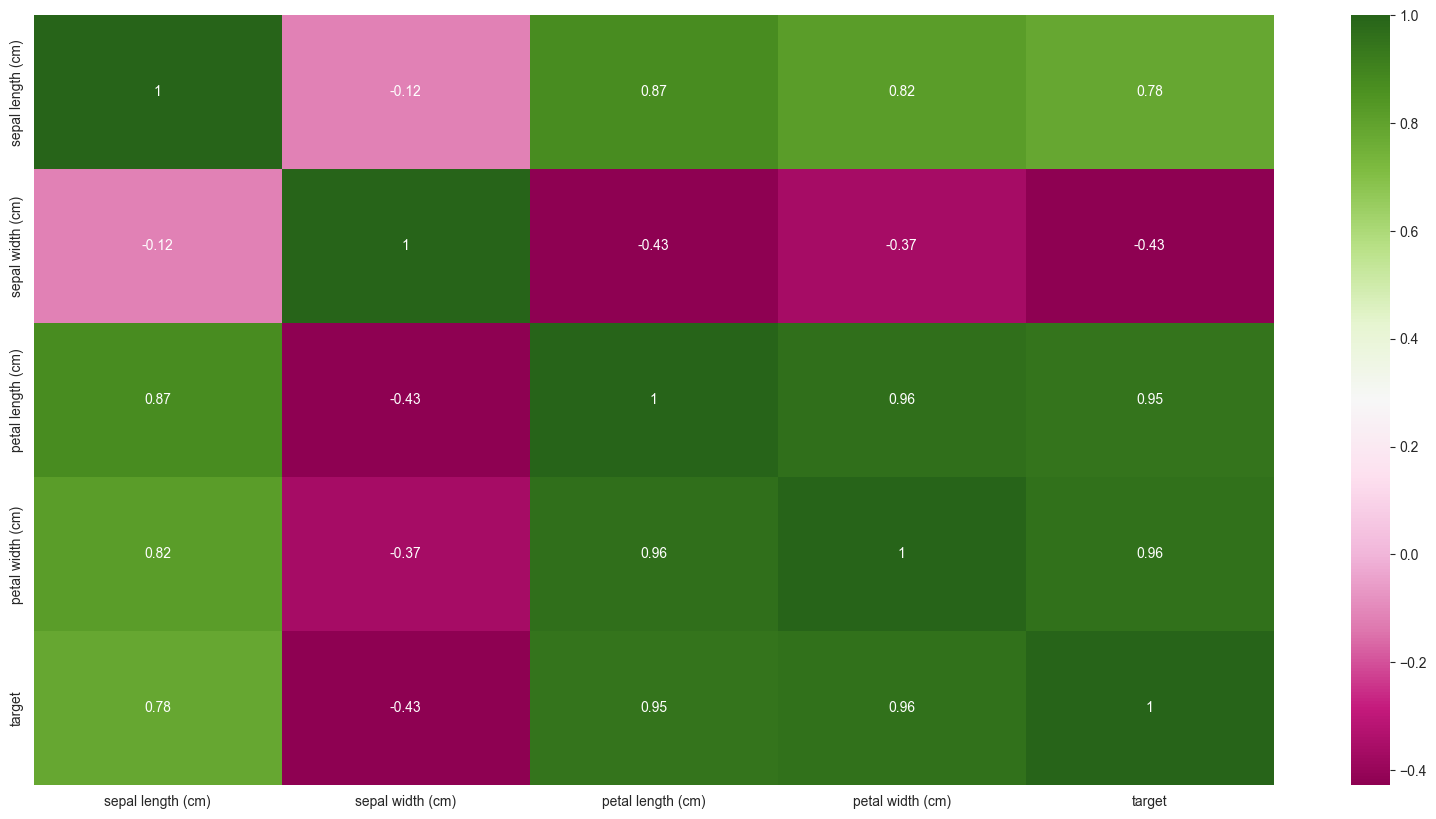

In [826]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True, cmap="PiYG")

**sepal width (cm)** имеет отрицательную корреляцию с **target**. Другие признаки имеют большую корреляцию с целевым признаком. При этом у данных признаков также наблюдается сильная корреляция между собой.

## Преобразование признаков (Feature Engineering)

В датасете содержится категориальный признак **target**, однако он уже закодирован и подлежит дальнейшему анализу.

In [827]:
from sklearn.model_selection import train_test_split

x = df.drop(['target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=19)

## Масштабирование признаков

In [828]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_train_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.069781,0.957976,-1.396348,-1.194283
1,0.013237,-0.145683,0.235820,0.392804
2,0.133572,-0.366415,0.404665,0.392804
3,-1.791794,-0.145683,-1.396348,-1.326540
4,-1.912129,-0.145683,-1.508911,-1.458797
...,...,...,...,...
95,1.216591,0.075049,0.629792,0.392804
96,-0.949446,1.620171,-1.283785,-1.194283
97,-0.949446,-1.249342,-0.439560,-0.136225
98,0.735249,0.295781,0.742355,1.054090


In [829]:
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
x_test_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.430788,0.295781,-1.396348,-1.326540
1,1.096255,-0.145683,0.967482,1.186347
2,-0.468105,-1.028610,0.348383,-0.003968
3,-0.347769,-0.145683,0.179538,0.128289
4,-0.829111,0.957976,-1.283785,-1.326540
5,-1.069781,0.737244,-1.283785,-1.326540
6,-1.791794,-0.366415,-1.340066,-1.326540
7,-1.190117,1.178707,-1.340066,-1.458797
8,-0.347769,-0.807878,0.235820,0.128289
9,2.058938,-0.145683,1.586580,1.186347


## Подбор оптимальных признаков (RFE)

In [830]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeClassifierCV

rfecv = RFECV(estimator=RidgeClassifierCV())

rfecv.fit(x_train_scaled, y_train)

selected_features = list(x_train_scaled.columns[rfecv.support_])
print("Optimal features: ", rfecv.n_features_)
print("Selected features: ", selected_features)

Optimal features:  3
Selected features:  ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [831]:
x_train_scaled = x_train_scaled[selected_features]
x_train_scaled

,sepal width (cm),petal length (cm),petal width (cm)
0,0.957976,-1.396348,-1.194283
1,-0.145683,0.235820,0.392804
2,-0.366415,0.404665,0.392804
3,-0.145683,-1.396348,-1.326540
4,-0.145683,-1.508911,-1.458797
...,...,...,...
95,0.075049,0.629792,0.392804
96,1.620171,-1.283785,-1.194283
97,-1.249342,-0.439560,-0.136225
98,0.295781,0.742355,1.054090


In [832]:
x_test_scaled = x_test_scaled[selected_features]
x_test_scaled

,sepal width (cm),petal length (cm),petal width (cm)
0,0.295781,-1.396348,-1.326540
1,-0.145683,0.967482,1.186347
2,-1.028610,0.348383,-0.003968
3,-0.145683,0.179538,0.128289
4,0.957976,-1.283785,-1.326540
5,0.737244,-1.283785,-1.326540
6,-0.366415,-1.340066,-1.326540
7,1.178707,-1.340066,-1.458797
8,-0.807878,0.235820,0.128289
9,-0.145683,1.586580,1.186347


## Подбор оптимальных гиперпараметров и кросс-валидация

In [833]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=19)

### Библиотечная реализация LogisticRegression

In [834]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [1E-3, 1E-1, 1, 1E+1, 1E+3]}

searcher = GridSearchCV(LogisticRegression(random_state=19), param_grid=param_grid, cv=cv, verbose=5,
                        scoring="roc_auc_ovr", error_score="raise")

searcher = searcher.fit(x_train_scaled, y_train)

optimal_logreg_c = searcher.best_params_["C"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...........................C=0.001;, score=0.897 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.930 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.909 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.919 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.886 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.960 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.996 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.992 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.985 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.974 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 2/5] END ...............................C=1;,

### Библиотечная реализация SVM

In [835]:
from sklearn.svm import SVC

param_grid = {"kernel": ["linear", "rbf"],
              "C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "gamma": ["scale", "auto", 1E-3, 1E-1, 1, 1E+1, 1E+3]}

searcher = GridSearchCV(SVC(random_state=19, probability=True), param_grid=param_grid, cv=cv, verbose=5,
                        scoring="roc_auc_ovr", error_score="raise")

searcher = searcher.fit(x_train_scaled, y_train)

optimal_kernel = searcher.best_params_["kernel"]
optimal_svm_c = searcher.best_params_["C"]
optimal_gamma = searcher.best_params_["gamma"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear

### Библиотечная реализация KNN

In [836]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{"n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
               "weights": ['distance', 'uniform']}]

searcher = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv, verbose=5,
                        scoring="roc_auc_ovr", error_score="raise")

searcher = searcher.fit(x_train_scaled, y_train)

optimal_n_neighbors = searcher.best_params_["n_neighbors"]
optimal_weights = searcher.best_params_["weights"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.963 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.964 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.959 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.927 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.964 total time=   0.0s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.959 total time=   0.0s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.927 total time=   0.0s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance

### Библиотечная реализация Naive Bayes

In [837]:
from sklearn.naive_bayes import GaussianNB

param_grid = [{"var_smoothing": np.logspace(0, -10, num=100)}]

searcher = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=cv, verbose=5,
                        scoring="roc_auc_ovr", error_score="raise")

searcher = searcher.fit(x_train_scaled, y_train)

optimal_var_smoothing = searcher.best_params_["var_smoothing"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.996 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=1.000 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.996 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.993 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.989 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.7924828983539173;, score=1.000 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.7924828983539173;, score=1.000 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.7924828983539173;, score=1.000 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.7924828983539173;, score=0.993 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.7924828983539173;, score=0.989 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.6280291441834253;, score=1.000 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.628029144183425

### Библиотечная реализация Decision Tree

In [838]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"criterion": ["gini", "entropy", "log_loss"],
               "splitter": ["best", "random"],
               "max_depth": [10, 20, 30],
               "min_samples_split": [2, 5, 10],
               "min_samples_leaf": [2, 5, 10],
               "max_features": [2, 5, 10]}]

searcher = GridSearchCV(DecisionTreeClassifier(random_state=19), param_grid=param_grid, cv=cv, verbose=5,
                        scoring="roc_auc_ovr", error_score="raise")

searcher = searcher.fit(x_train_scaled, y_train)

optimal_criterion = searcher.best_params_["criterion"]
optimal_splitter = searcher.best_params_["splitter"]
optimal_max_depth = searcher.best_params_["max_depth"]
optimal_min_samples_split = searcher.best_params_["min_samples_split"]
optimal_min_samples_leaf = searcher.best_params_["min_samples_leaf"]
optimal_max_features = searcher.best_params_["max_features"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.964 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.912 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_featu

## Тестирование обученных моделей

In [839]:
from sklearn.model_selection import cross_validate

def measure_time(model, X, y):
    return cross_validate(model, X, y, cv=5)["fit_time"].mean()

accuracies = {}
times = {}

## Стратегия **OneVsRest**

### Библиотечная реализация LogisticRegression

In [840]:
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

ovr_logreg = OneVsRestClassifier(LogisticRegression(C=optimal_logreg_c, random_state=19)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovr_logreg.predict(x_test))
time = measure_time(ovr_logreg, x_train, y_train)

accuracies["OVR_LOGREG"] = accuracy
times["OVR_LOGREG"] = time

print(f"OVR_LOGREG accuracy {accuracy}")
print(f"OVR_LOGREG time {time}")

OVR_LOGREG accuracy 0.94
OVR_LOGREG time 0.017081356048583983


### Библиотечная реализация SVM

In [841]:
ovr_svm = OneVsRestClassifier(SVC(kernel=optimal_kernel, C=optimal_svm_c, gamma=optimal_gamma, random_state=19, probability=True)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovr_svm.predict(x_test))
time = measure_time(ovr_svm, x_train, y_train)

accuracies["OVR_SVM"] = accuracy
times["OVR_SVM"] = time

print(f"OVR_SVM accuracy {accuracy}")
print(f"OVR_SVM time {time}")

OVR_SVM accuracy 0.9
OVR_SVM time 0.007236003875732422


### Библиотечная реализация KNN

In [842]:
ovr_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=optimal_n_neighbors)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovr_knn.predict(x_test))
time = measure_time(ovr_knn, x_train, y_train)

accuracies["OVR_KNN"] = accuracy
times["OVR_KNN"] = time

print(f"OVR_KNN accuracy {accuracy}")
print(f"OVR_KNN time {time}")

OVR_KNN accuracy 0.96
OVR_KNN time 0.004466009140014648


### Библиотечная реализация Naive Bayes

In [843]:
ovr_nb = OneVsRestClassifier(GaussianNB(var_smoothing=optimal_var_smoothing)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovr_nb.predict(x_test))
time = measure_time(ovr_nb, x_train, y_train)

accuracies["OVR_NB"] = accuracy
times["OVR_NB"] = time

print(f"OVR_NB accuracy {accuracy}")
print(f"OVR_NB time {time}")

OVR_NB accuracy 0.92
OVR_NB time 0.007690715789794922


### Библиотечная реализация Decision Tree

In [844]:
ovr_dt = OneVsRestClassifier(DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                                                    max_features=optimal_max_features, min_samples_leaf=optimal_min_samples_leaf,
                                                    min_samples_split=optimal_min_samples_split, splitter=optimal_splitter, random_state=19)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovr_dt.predict(x_test))
time = measure_time(ovr_dt, x_train, y_train)

accuracies["OVR_DT"] = accuracy
times["OVR_DT"] = time

print(f"OVR_DT accuracy {accuracy}")
print(f"OVR_DT time {time}")

OVR_DT accuracy 0.92
OVR_DT time 0.0085723876953125


## Стратегия **OneVsOne**

### Библиотечная реализация LogisticRegression

In [845]:
from sklearn.multiclass import OneVsOneClassifier

ovo_logreg = OneVsOneClassifier(LogisticRegression(C=optimal_logreg_c, random_state=19)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovo_logreg.predict(x_test))
time = measure_time(ovo_logreg, x_train, y_train)

accuracies["OVO_LOGREG"] = accuracy
times["OVO_LOGREG"] = time

print(f"OVO_LOGREG accuracy {accuracy}")
print(f"OVO_LOGREG time {time}")

OVO_LOGREG accuracy 0.94
OVO_LOGREG time 0.01642007827758789


### Библиотечная реализация SVM

In [846]:
ovo_svm = OneVsOneClassifier(SVC(kernel=optimal_kernel, C=optimal_svm_c, gamma=optimal_gamma, random_state=19, probability=True)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovo_svm.predict(x_test))
time = measure_time(ovo_svm, x_train, y_train)

accuracies["OVO_SVM"] = accuracy
times["OVO_SVM"] = time

print(f"OVO_SVM accuracy {accuracy}")
print(f"OVO_SVM time {time}")

OVO_SVM accuracy 0.94
OVO_SVM time 0.003280830383300781


### Библиотечная реализация KNN

In [847]:
ovo_knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=optimal_n_neighbors)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovo_knn.predict(x_test))
time = measure_time(ovo_knn, x_train, y_train)

accuracies["OVO_KNN"] = accuracy
times["OVO_KNN"] = time

print(f"OVO_KNN accuracy {accuracy}")
print(f"OVO_KNN time {time}")

OVO_KNN accuracy 0.96
OVO_KNN time 0.0016390323638916016


### Библиотечная реализация Naive Bayes

In [848]:
ovo_nb = OneVsOneClassifier(GaussianNB(var_smoothing=optimal_var_smoothing)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovo_nb.predict(x_test))
time = measure_time(ovo_nb, x_train, y_train)

accuracies["OVO_NB"] = accuracy
times["OVO_NB"] = time

print(f"OVO_NB accuracy {accuracy}")
print(f"OVO_NB time {time}")

OVO_NB accuracy 0.92
OVO_NB time 0.004053354263305664


### Библиотечная реализация Decision Tree

In [849]:
ovo_dt = OneVsOneClassifier(DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                                                    max_features=optimal_max_features, min_samples_leaf=optimal_min_samples_leaf,
                                                    min_samples_split=optimal_min_samples_split, splitter=optimal_splitter, random_state=19)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, ovo_dt.predict(x_test))
time = measure_time(ovo_dt, x_train, y_train)

accuracies["OVO_DT"] = accuracy
times["OVO_DT"] = time

print(f"OVO_DT accuracy {accuracy}")
print(f"OVO_DT time {time}")

OVO_DT accuracy 0.96
OVO_DT time 0.004011726379394532


## Стратегия **OutputCode**

### Библиотечная реализация LogisticRegression

In [850]:
from sklearn.multiclass import OutputCodeClassifier

oc_logreg = OutputCodeClassifier(LogisticRegression(C=optimal_logreg_c, random_state=19)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, oc_logreg.predict(x_test))
time = measure_time(oc_logreg, x_train, y_train)

accuracies["OC_LOGREG"] = accuracy
times["OC_LOGREG"] = time

print(f"OC_LOGREG accuracy {accuracy}")
print(f"OC_LOGREG time {time}")

OC_LOGREG accuracy 0.74
OC_LOGREG time 0.01647815704345703


### Библиотечная реализация SVM

In [851]:
oc_svm = OutputCodeClassifier(SVC(kernel=optimal_kernel, C=optimal_svm_c, gamma=optimal_gamma, random_state=19, probability=True)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, oc_svm.predict(x_test))
time = measure_time(oc_svm, x_train, y_train)

accuracies["OC_SVM"] = accuracy
times["OC_SVM"] = time

print(f"OC_SVM accuracy {accuracy}")
print(f"OC_SVM time {time}")

OC_SVM accuracy 0.68
OC_SVM time 0.007867193222045899


### Библиотечная реализация KNN

In [852]:
oc_knn = OutputCodeClassifier(KNeighborsClassifier(n_neighbors=optimal_n_neighbors)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, oc_knn.predict(x_test))
time = measure_time(oc_knn, x_train, y_train)

accuracies["OC_KNN"] = accuracy
times["OC_KNN"] = time

print(f"OC_KNN accuracy {accuracy}")
print(f"OC_KNN time {time}")

OC_KNN accuracy 0.96
OC_KNN time 0.004363727569580078


### Библиотечная реализация Naive Bayes

In [853]:
oc_nb = OutputCodeClassifier(GaussianNB(var_smoothing=optimal_var_smoothing)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, oc_nb.predict(x_test))
time = measure_time(oc_nb, x_train, y_train)

accuracies["OC_NB"] = accuracy
times["OC_NB"] = time

print(f"OC_NB accuracy {accuracy}")
print(f"OC_NB time {time}")

OC_NB accuracy 0.66
OC_NB time 0.006364154815673828


### Библиотечная реализация Decision Tree

In [854]:
oc_dt = OutputCodeClassifier(DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                                                   max_features=optimal_max_features, min_samples_leaf=optimal_min_samples_leaf,
                                                   min_samples_split=optimal_min_samples_split, splitter=optimal_splitter, random_state=19)).fit(x_train, y_train)
accuracy = accuracy_score(y_test, oc_dt.predict(x_test))
time = measure_time(oc_dt, x_train, y_train)

accuracies["OC_DT"] = accuracy
times["OC_DT"] = time

print(f"OC_DT accuracy {accuracy}")
print(f"OC_DT time {time}")

OC_DT accuracy 0.94
OC_DT time 0.005965518951416016


## Сравнение обученных моделей

### Точность

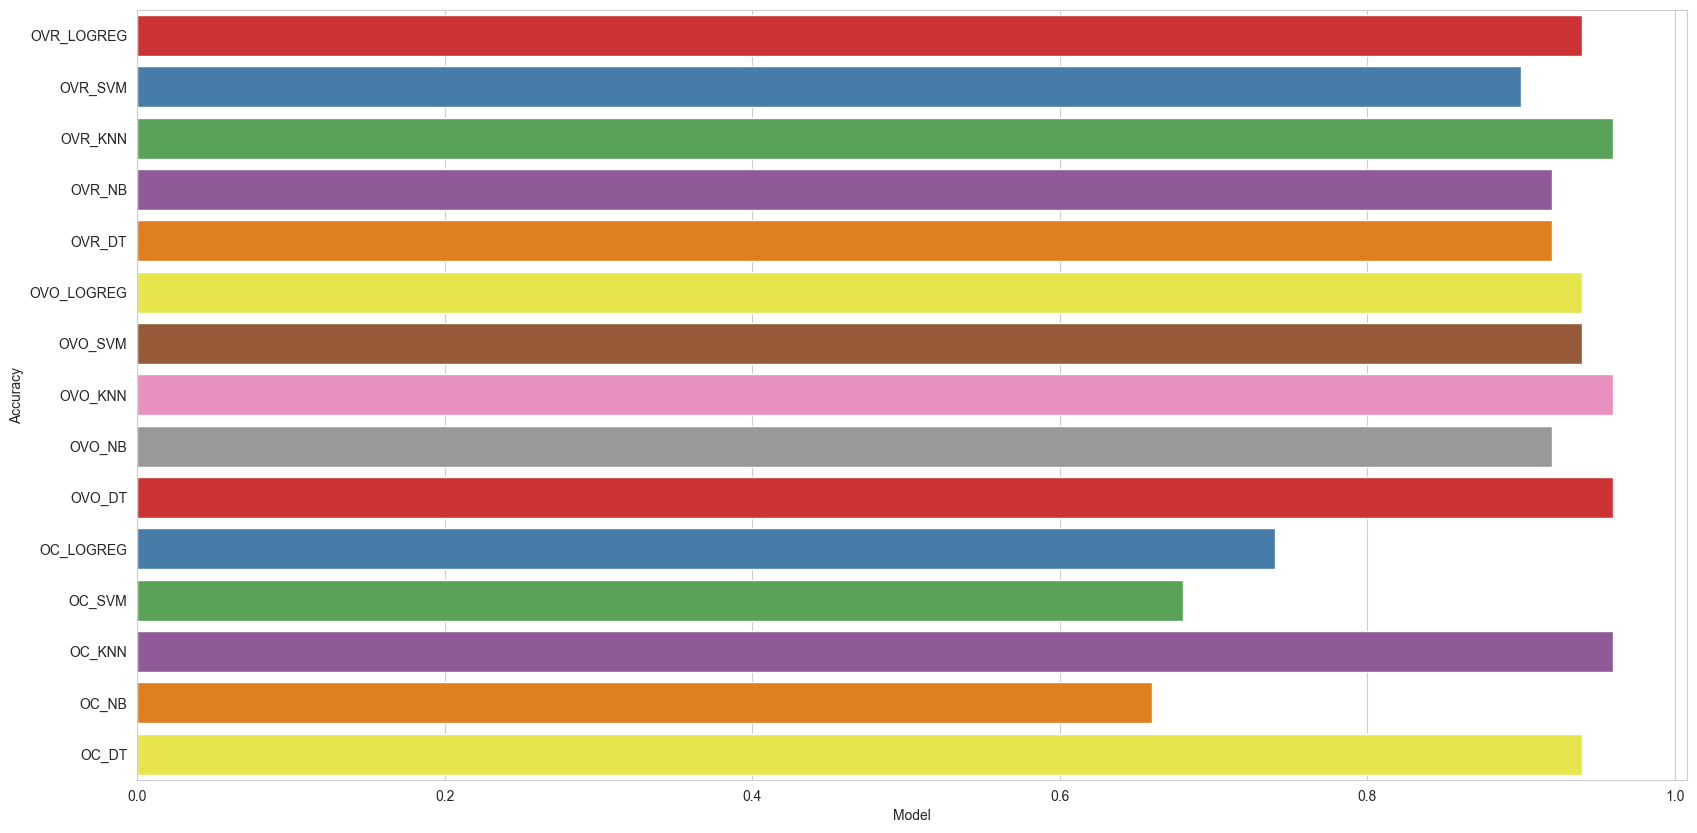

In [855]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.05, 0.05))

sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()), palette=sns.color_palette("Set1", len(times)))
plt.show()

### Время

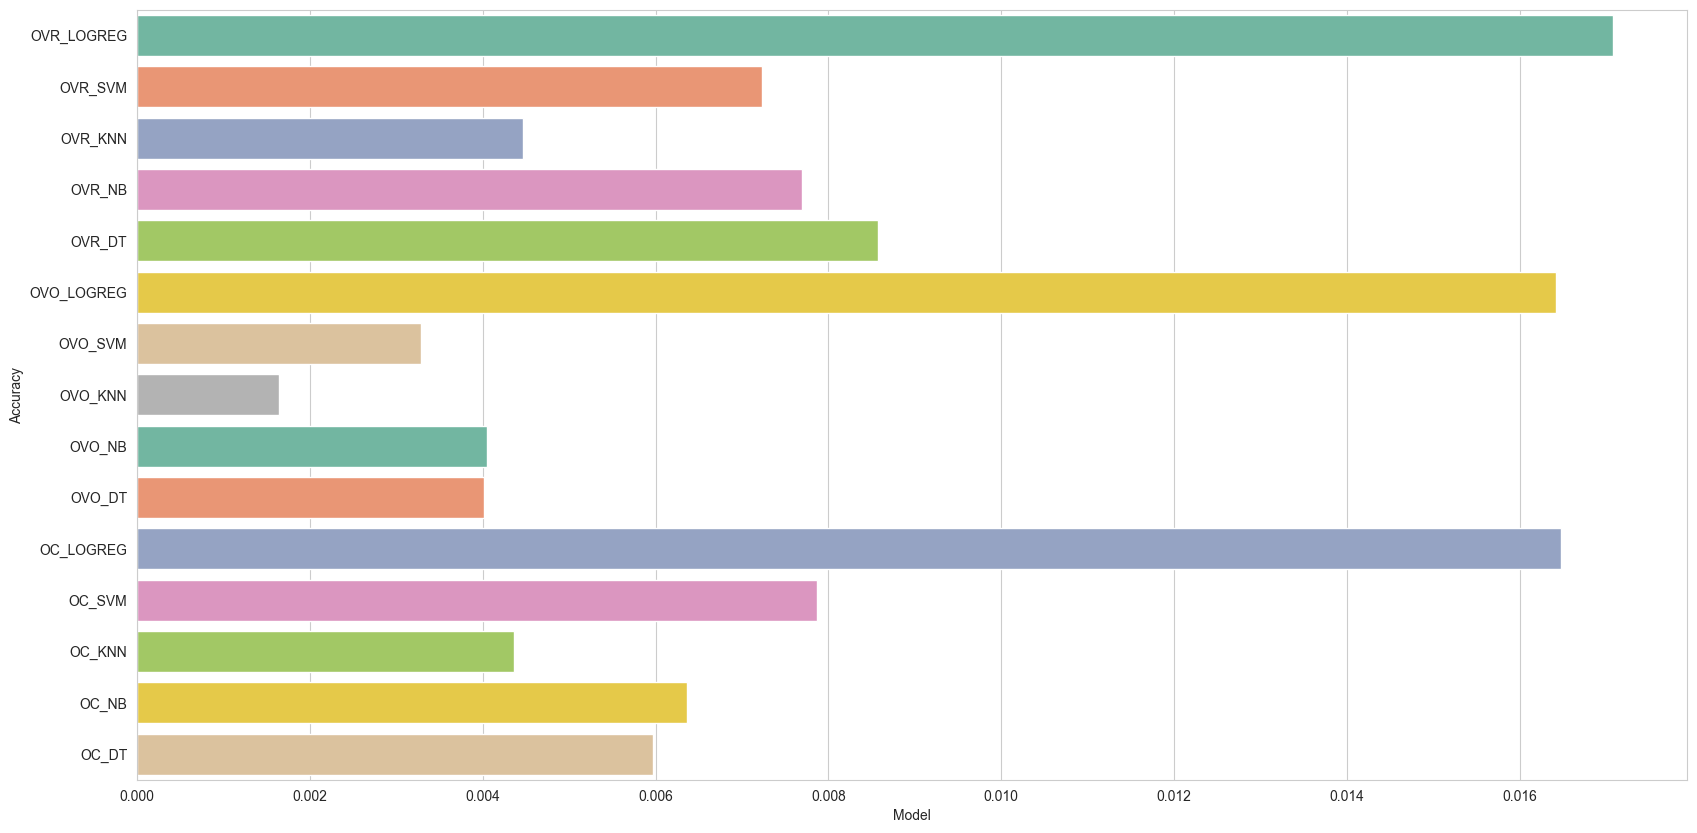

In [856]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.05, 0.05))

sns.barplot(x=list(times.values()), y=list(times.keys()), palette=sns.color_palette("Set2", len(times)))
plt.show()

## Выводы об обученных моделях датасета

Наибольшую точность среди всех моделей показала стратегия **OneVsOne**.
Наименьшую точность среди всех моделей показала стратегия **OutputCode**.
Наименьшее время исполнения среди всех моделей показала стратегия **OneVsOne**.
Наибольшее время исполнения среди всех моделей показала стратегия **OutputCode**.
Лучший результат по точности и времени среди всех моделей показала библиотечная реализация метода ближайших соседей **KNN**.
Худший результат по точности и времени среди всех моделей показала библиотечная реализация метода логистической регрессии **LOGREG**.